 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns

whale_returns_csv = Path ("resources/whale_returns.csv")
whale_returns_pd = pd.read_csv (whale_returns_csv, index_col="Date", parse_dates=True)
whale_returns_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

whale_returns_pd.isnull ().sum ()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_returns_pd.dropna (inplace=True)
whale_returns_pd.isnull ().sum ()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns

algo_returns_csv = Path ("resources/algo_returns.csv")
algo_returns_pd = pd.read_csv (algo_returns_csv, index_col="Date", parse_dates=True)
algo_returns_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls

algo_returns_pd.isnull ().sum ()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo_returns_pd.dropna (inplace=True)
algo_returns_pd.isnull ().sum ()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices

sp_tsx_history_csv = Path ("resources/sp_tsx_history.csv")
sp_tsx_history_pd = pd.read_csv (sp_tsx_history_csv, index_col="Date", parse_dates=True)
sp_tsx_history_pd.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types

# sp_tsx_history_pd.dtypes

# uses info() for more detailed return
sp_tsx_history_pd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [10]:
# Fix Data Types

"""
- avoids FutureWarning by explict regex=True in .str.replace("to_be_replaced", "to_be_placed", regex=True)
- pandas docs example code: dframe['colname'] = dframe['colname'].str.replace(r'\D+', regex=True)
- removes string: $ string object, futre-proofing: based on above python4 FutureWarning about explicit regex=True delcaration
"""
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].str.replace("$", "", regex=True).replace(",", "", regex=True)

# changes to float: pandas.dataframe["target_dtype"].astype('float64')
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].astype('float')

# views latest interation of pd.df - remove for submission
sp_tsx_history_pd.info()
print()
sp_tsx_history_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1818 non-null   float64
dtypes: float64(1)
memory usage: 28.4 KB



,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
# Calculate Daily Returns

sp_tsx_daily_returns = sp_tsx_history_pd.pct_change()

# views latest interation of pd.df - remove for submission
sp_tsx_daily_returns.info()
# print()
sp_tsx_daily_returns.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1817 non-null   float64
dtypes: float64(1)
memory usage: 28.4 KB


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace = True)

sp_tsx_daily_returns.info() # reports only 1 NaN
print()
sp_tsx_daily_returns.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1817 entries, 2012-10-02 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1817 non-null   float64
dtypes: float64(1)
memory usage: 28.4 KB



,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns={'Close': 'SP500 TSX 60'})

# views latest interation of pd.df - remove for submission
sp_tsx_daily_returns.head()

,SP500 TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

daily_returns_concat = pd.concat([whale_returns_pd, algo_returns_pd, sp_tsx_daily_returns], axis= "columns", join='inner')

# views latest interation of pd.df - remove for submission
daily_returns_concat.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

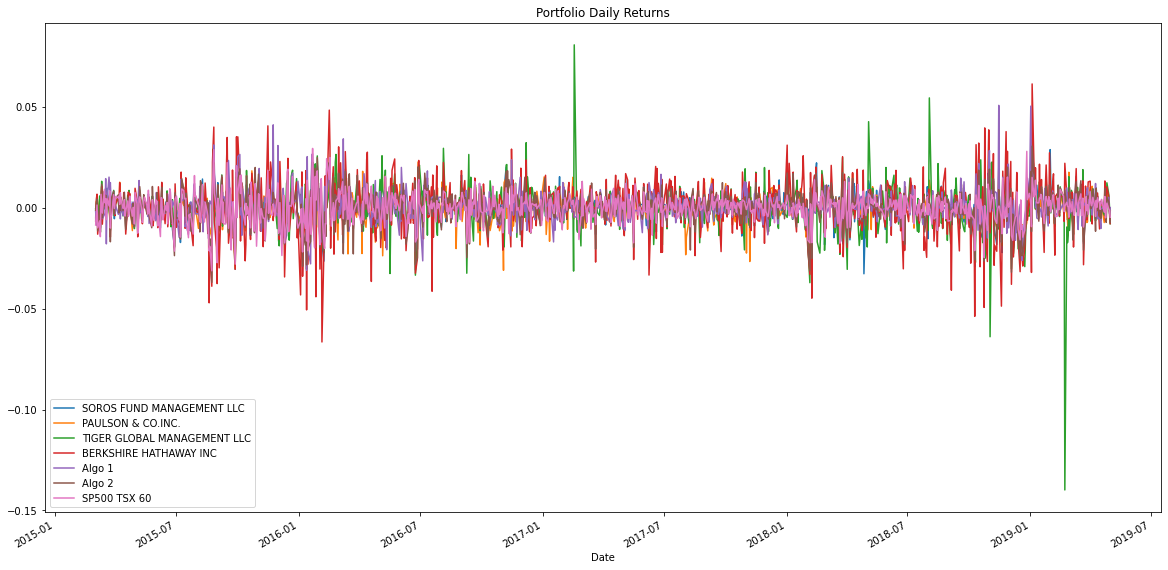

In [15]:
# Plot daily returns of all portfolios

# kind="line" spec'd demonstrating the option for diff. plot types
daily_returns_concat.plot(kind="line",  title="Portfolio Daily Returns", figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

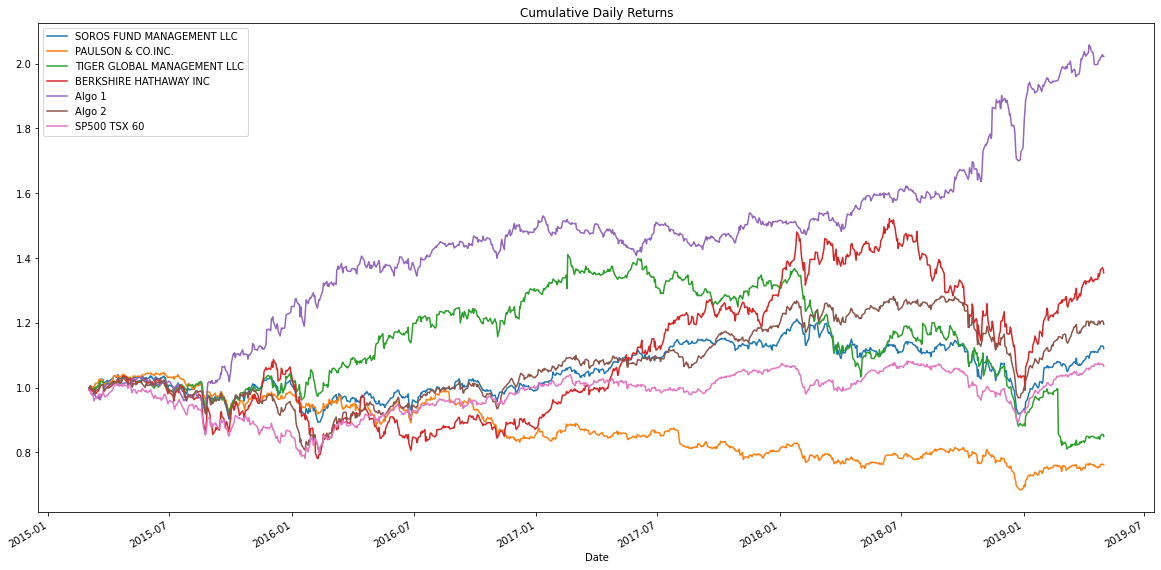

In [16]:
# Calculate cumulative returns of all portfolios
# cumulative_returns = daily_returns_concat.pct_change()[1:]
cumulative_returns = (1+ daily_returns_concat).cumprod()

# view pct_change
# print(cumulative_returns.head())

# kind="line" spec'd demonstrating the option for diff. plot types
# Plot cumulative returns
cumulative_returns.plot(kind="line", title="Cumulative Daily Returns", figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.


### Create a box plot for each portfolio


In [17]:
# Box plot: kept thtis to record mistake
# TA: Mehdi advised keep the plot for daily_returns_concat, not the one rendered in the following line
# cumulative_returns.plot(kind ="box", title="Portfolio Risk", figsize = (20,10))

<AxesSubplot:title={'center':'Portfolio Risk'}>

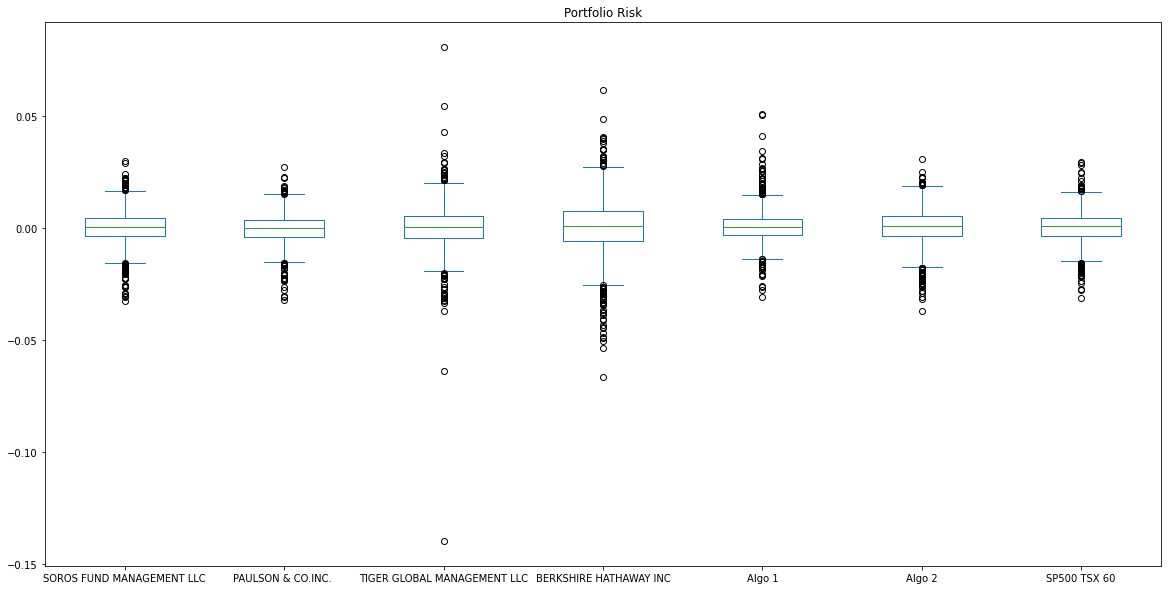

In [18]:
# Box plot to visually show risk
daily_returns_concat.plot(kind ="box", title="Portfolio Risk", figsize = (20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_returns_std = pd.DataFrame(daily_returns_concat.std()).rename(columns = {0:"STD"})

# view sp 500 tsx 60 std
daily_returns_std

,STD
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
SP500 TSX 60,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = daily_returns_std.loc["SP500 TSX 60", "STD"].round(decimals=6)

# view sp 500 tsx 60 std
sp_tsx_std

0.007034

In [21]:
# Determine which portfolios are riskier than the S&P TSX 60
riskier_than_sp_tsx_std = daily_returns_std[daily_returns_std["STD"] > daily_returns_std.loc["SP500 TSX 60", "STD"]]

# view portfolio std that are riskier than sp 500 tsx 60
riskier_than_sp_tsx_std

,STD
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_returns_std * np.sqrt(252)

# view annualized standard deviation
annualized_std

,STD
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
SP500 TSX 60,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21d_std = daily_returns_std * np.sqrt(21)

# vew rolling standard deviation for all portfolios using a 21-day window
rolling_21d_std

,STD
SOROS FUND MANAGEMENT LLC,0.035870
PAULSON & CO.INC.,0.031997
TIGER GLOBAL MANAGEMENT LLC,0.049871
BERKSHIRE HATHAWAY INC,0.058774
Algo 1,0.034777
Algo 2,0.038156
SP500 TSX 60,0.032235


<AxesSubplot:title={'center':'Portfolio Rolling standard deviation'}>

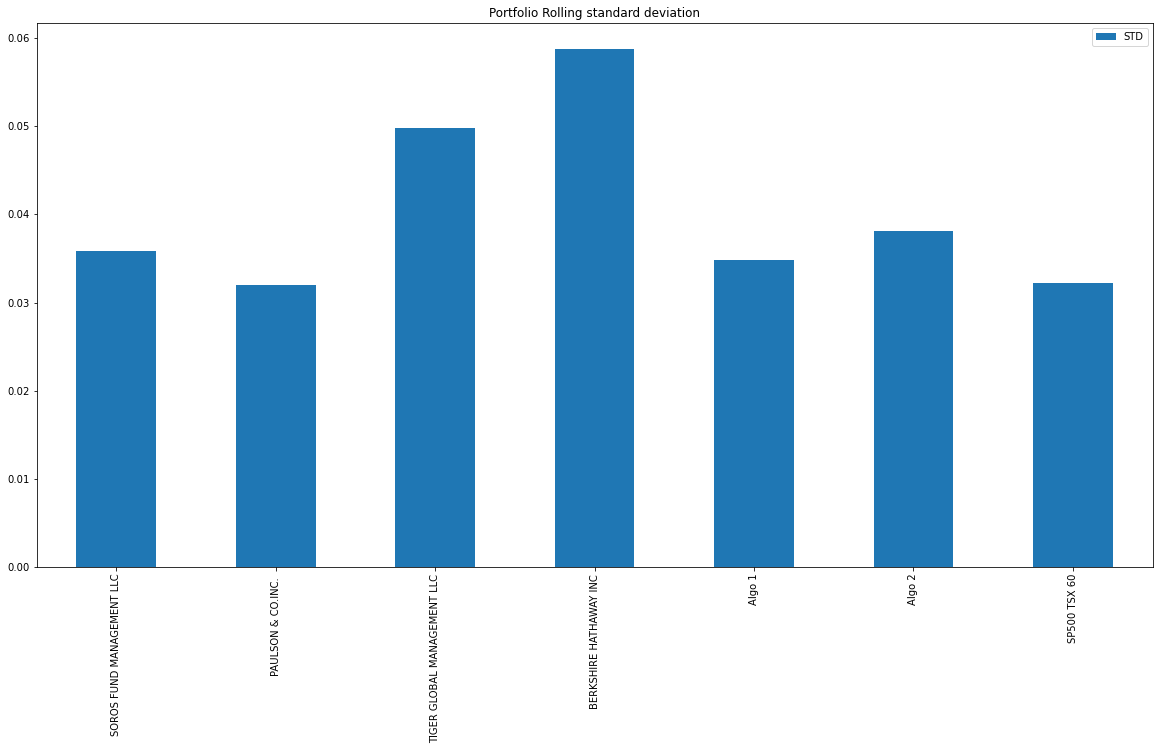

In [24]:
# Plot the rolling standard deviation
rolling_21d_std.plot(kind ="bar", title="Portfolio Rolling standard deviation", figsize = (20,10))

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
sp_tsx_correlation = pd.DataFrame(daily_returns_concat.corr()).loc["SP500 TSX 60"]
sp_tsx_correlation[sp_tsx_correlation==sp_tsx_correlation[sp_tsx_correlation<1].max()]

sp_tsx_correlation

SOROS FUND MANAGEMENT LLC      0.673930
PAULSON & CO.INC.              0.486511
TIGER GLOBAL MANAGEMENT LLC    0.440583
BERKSHIRE HATHAWAY INC         0.557250
Algo 1                         0.310276
Algo 2                         0.737370
SP500 TSX 60                   1.000000
Name: SP500 TSX 60, dtype: float64

[Text(0.5, 1.0, 'Correlation matrix for Daily Returns Concat Dataframe')]

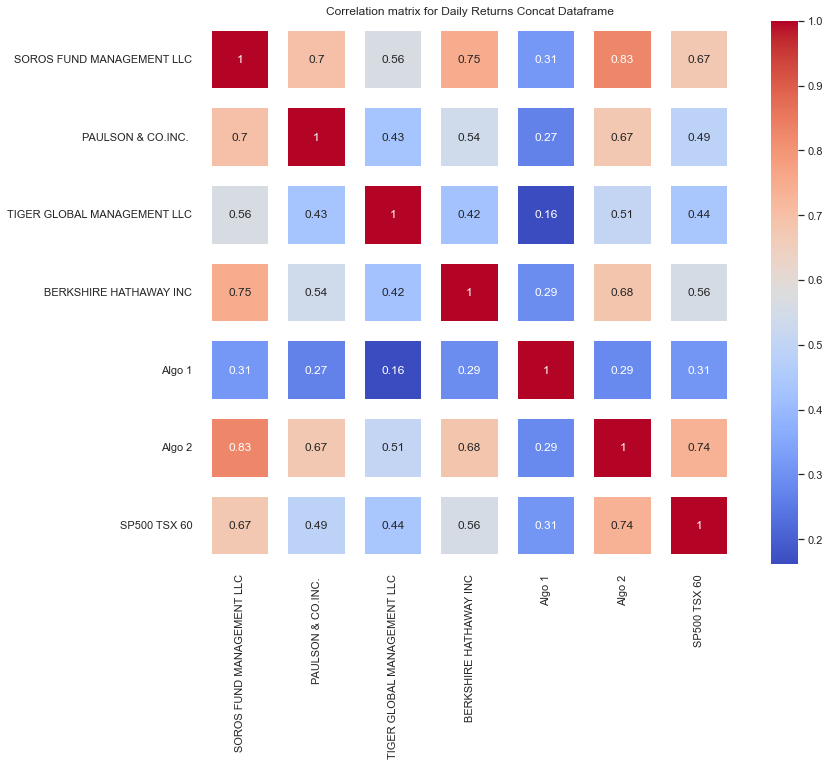

In [26]:
# Display de correlation matrix
sp_tsx_correlation = daily_returns_concat.corr()

sns.set(rc={"figure.figsize":(12, 10)})
sns.heatmap(sp_tsx_correlation, cmap="coolwarm", linewidths=20, annot=True).set(title="Correlation matrix for Daily Returns Concat Dataframe")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Beta Plot - Soros Fund Management llc : SP500 TSX 60'}, xlabel='Date'>

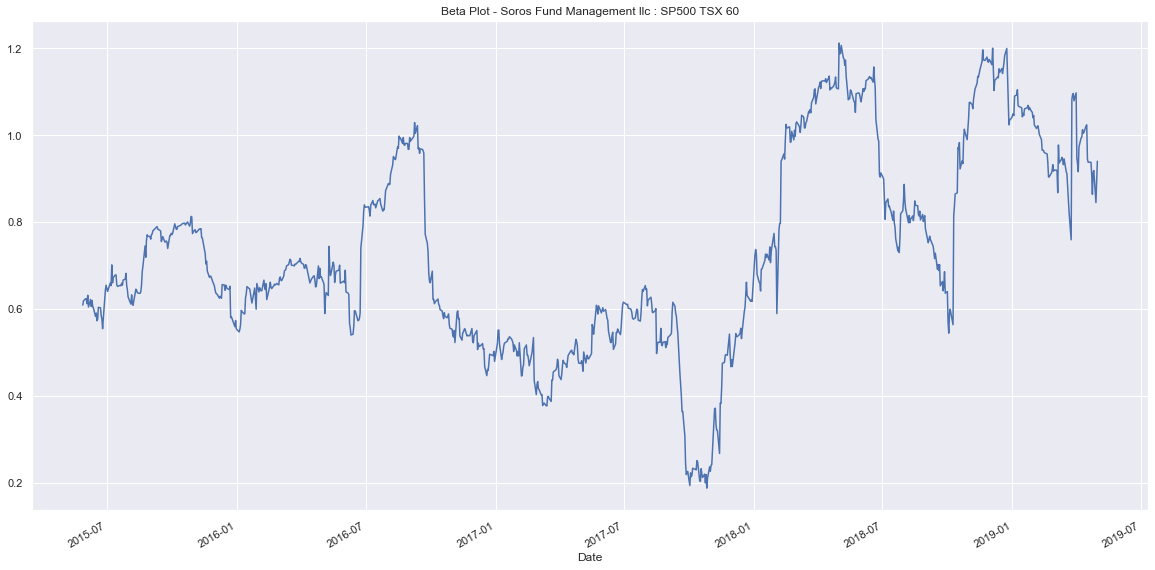

In [27]:
# Calculate covariance of a single portfolio
soros_sptsx_cov = daily_returns_concat["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(daily_returns_concat["SP500 TSX 60"])

# print(soros_sptsx_cov)

# Calculate variance of S&P TSX
sptsx_var = daily_returns_concat["SP500 TSX 60"].rolling(window=60).var()

# print(sptsx_cov)

# Computing beta
soros_sptsx_beta = soros_sptsx_cov / sptsx_var

# print(soros_sptsx_beta)

# Plot beta trend
soros_sptsx_beta.plot(kind="line", title="Beta Plot - Soros Fund Management llc : SP500 TSX 60", figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [28]:
# Use `ewm` to calculate the rolling window

# challenge: review/revisit upon completion of mandatory workload
# sptsx_ewm = daily_returns_concat["SP500 TSX 60"].ewm()
# sptsx_ewm = daily_returns_concat.ewm(halflife=21)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
daily_returns_sharpe = (daily_returns_concat.mean() * 252) / ( daily_returns_concat.std() * np.sqrt(252))
daily_returns_sharpe.sort_values()

PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
SP500 TSX 60                   0.195550
SOROS FUND MANAGEMENT LLC      0.286709
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios for the Portfolio Daily Returns'}>

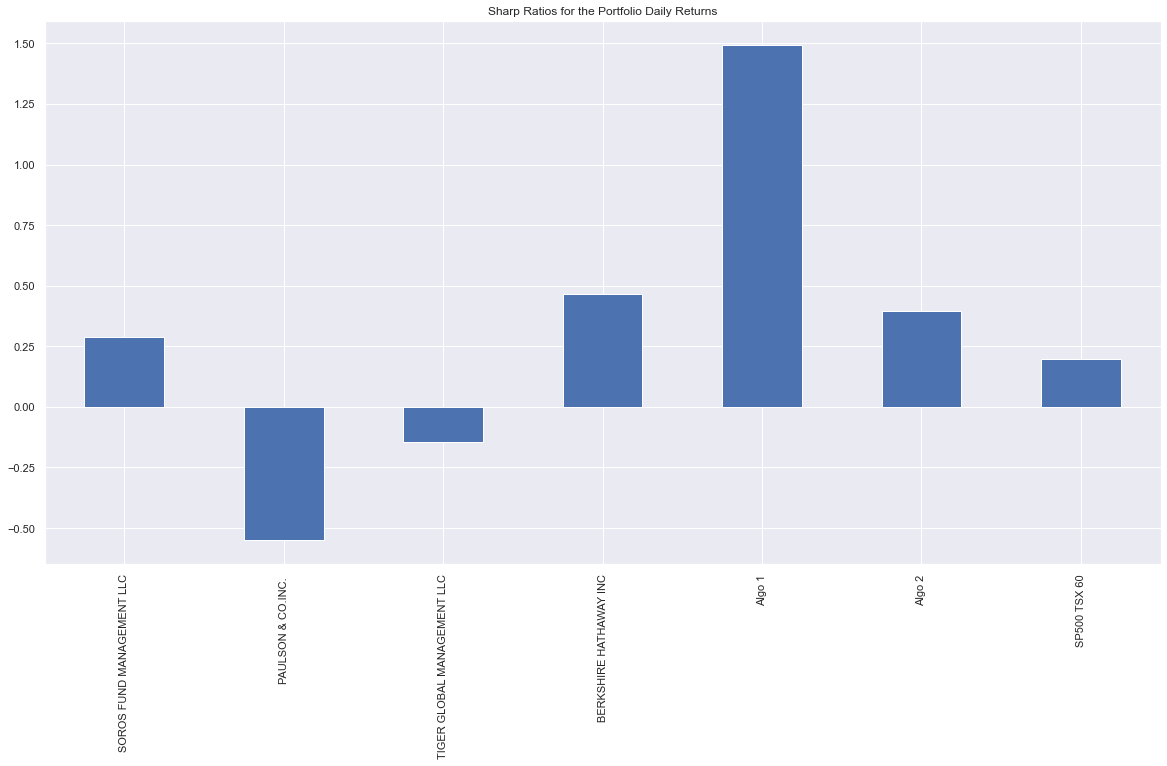

In [30]:
# Visualize the sharpe ratios as a bar plot
daily_returns_sharpe.plot(kind ="bar", title="Sharp Ratios for the Portfolio Daily Returns", figsize = (20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
# MKTX

mktx_history_csv = Path ("resources/MKTX_Γ_historical.csv")
mktx_history_pd = pd.read_csv (mktx_history_csv, index_col="date", parse_dates=True)

# view the dataframe
mktx_history_pd.info()
print()
mktx_history_pd.head ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2015-05-11 to 2019-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MKTX    1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB



,MKTX
date,
2015-05-11,86.09
2015-05-12,86.03
2015-05-13,86.07
2015-05-14,87.27
2015-05-15,87.53


In [32]:
# Reading data from 2nd stock
# PYPL

pypl_history_csv = Path ("resources/PYPL_Γ_historical.csv")
pypl_history_pd = pd.read_csv (pypl_history_csv, index_col="date", parse_dates=True)

# view the dataframe
pypl_history_pd.info()
print()
pypl_history_pd.head ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 963 entries, 2015-07-06 to 2019-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PYPL    963 non-null    float64
dtypes: float64(1)
memory usage: 15.0 KB



,PYPL
date,
2015-07-06,36.71
2015-07-07,36.55
2015-07-08,34.68
2015-07-09,34.49
2015-07-10,34.89


In [33]:
# Reading data from 3rd stock
# SQ

sq_history_csv = Path ("resources/SQ_Γ_historical.csv")
sq_history_pd = pd.read_csv (sq_history_csv, index_col="date", parse_dates=True)

# view the dataframe
sq_history_pd.info()
print()
sq_history_pd.head ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 866 entries, 2015-11-19 to 2019-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SQ      866 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB



,SQ
date,
2015-11-19,13.04
2015-11-20,12.80
2015-11-23,12.10
2015-11-24,12.02
2015-11-25,11.90


In [34]:
# Combine all stocks in a single DataFrame
custom_concat = pd.concat([mktx_history_pd, pypl_history_pd, sq_history_pd], axis= "columns", join='inner')

# views latest interation of pd.df - remove for submission
# custom_concat.info()
# print()
print(custom_concat.head())

              MKTX    PYPL     SQ
date                             
2015-11-19  103.48  36.190  13.04
2015-11-20  106.66  36.370  12.80
2015-11-23  107.35  35.550  12.10
2015-11-24  105.25  35.125  12.02
2015-11-25  106.00  35.370  11.90


In [35]:
# Reset Date index

"""
Note: to whome it may concern, in my GitHub is a custom symbol and close-value .csv geneartaion tool based on code and activities from class. The rendered .csv negates this step in the homework. Please note in the bootcampspot.com assignment comments if this is madatory for full marks. I will ressubmit if required.
"""

'\nNote: to whome it may concern, in my GitHub is a custom symbol and close-value .csv geneartaion tool based on code and activities from class. The rendered .csv negates this step in the homework. Please note in the bootcampspot.com assignment comments if this is madatory for full marks. I will ressubmit if required.\n'

In [36]:
# Reorganize portfolio data by having a column per symbol

"""
Note: to whome it may concern, in my GitHub is a custom symbol and close-value .csv geneartaion tool based on code and activities from class. The rendered .csv negates this step in the homework. Please note in the bootcampspot.com assignment comments if this is madatory for full marks. I will ressubmit if required.
"""

'\nNote: to whome it may concern, in my GitHub is a custom symbol and close-value .csv geneartaion tool based on code and activities from class. The rendered .csv negates this step in the homework. Please note in the bootcampspot.com assignment comments if this is madatory for full marks. I will ressubmit if required.\n'

In [37]:
# Calculate daily returns

custom_daily_returns = custom_concat.pct_change()

# views latest interation of pd.df
# print(custom_daily_returns.info())
# print()
# print(custom_daily_returns.head())


# Drop NAs

custom_daily_returns.dropna (inplace=True)
custom_daily_returns.isnull ().sum ()

# Display sample data

custom_daily_returns.head()

,MKTX,PYPL,SQ
date,,,
2015-11-20,0.030731,0.004974,-0.018405
2015-11-23,0.006469,-0.022546,-0.054688
2015-11-24,-0.019562,-0.011955,-0.006612
2015-11-25,0.007126,0.006975,-0.009983
2015-11-27,0.016038,-0.005655,0.012605


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_weighted_portfolio = custom_daily_returns.dot(weights)
# custom_weighted_returns = custom_weighted_portfolio.pct_change()
custom_weighted_portfolio.dropna(inplace = True)

custom_weighted_portfolio.head()

date
2015-11-20    0.005766
2015-11-23   -0.023588
2015-11-24   -0.012710
2015-11-25    0.001373
2015-11-27    0.007663
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
custom_daily_returns_concat = pd.concat([custom_weighted_portfolio, daily_returns_concat], axis="columns", join="inner")
custom_daily_returns_concat.rename(columns = {0:"Custom Portfoilo"}, inplace = True)

custom_daily_returns_concat.head()

,Custom Portfoilo,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 TSX 60
2015-11-20,0.005766,0.005784,0.006760,0.003272,0.022681,-0.000583,0.000913,-0.002994
2015-11-23,-0.023588,-0.001089,-0.003781,0.003151,0.012117,0.012757,0.002214,-0.003805
2015-11-24,-0.012710,0.003382,0.006359,0.003376,-0.006365,0.041067,0.007598,0.001902
2015-11-25,0.001373,0.002190,0.004682,0.001628,0.000008,-0.000418,0.004740,-0.000329
2015-11-27,0.007663,-0.000389,0.000004,0.001180,0.004219,0.001387,0.003810,-0.004242


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_daily_returns_concat.dropna(inplace=True)
custom_daily_returns_concat.isnull().sum()

# compare .head() to verify .isnull()
custom_daily_returns_concat.head()

,Custom Portfoilo,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 TSX 60
2015-11-20,0.005766,0.005784,0.006760,0.003272,0.022681,-0.000583,0.000913,-0.002994
2015-11-23,-0.023588,-0.001089,-0.003781,0.003151,0.012117,0.012757,0.002214,-0.003805
2015-11-24,-0.012710,0.003382,0.006359,0.003376,-0.006365,0.041067,0.007598,0.001902
2015-11-25,0.001373,0.002190,0.004682,0.001628,0.000008,-0.000418,0.004740,-0.000329
2015-11-27,0.007663,-0.000389,0.000004,0.001180,0.004219,0.001387,0.003810,-0.004242


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`

# step 1
custom_daily_returns_std = pd.DataFrame(custom_daily_returns_concat.std()).rename(columns = {0:"STD"})

# view step 1
print(custom_daily_returns_std)

# step 2
custom_daily_annualized_std = custom_daily_returns_std * np.sqrt(252)

# step 2
print(custom_daily_annualized_std)

                                  STD
Custom Portfoilo             0.015367
SOROS FUND MANAGEMENT LLC    0.007772
PAULSON & CO.INC.            0.007169
TIGER GLOBAL MANAGEMENT LLC  0.011425
BERKSHIRE HATHAWAY INC       0.012855
Algo 1                       0.007481
Algo 2                       0.008245
SP500 TSX 60                 0.006535
                                  STD
Custom Portfoilo             0.243945
SOROS FUND MANAGEMENT LLC    0.123379
PAULSON & CO.INC.            0.113812
TIGER GLOBAL MANAGEMENT LLC  0.181364
BERKSHIRE HATHAWAY INC       0.204070
Algo 1                       0.118758
Algo 2                       0.130885
SP500 TSX 60                 0.103739


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling standard deviation with Custom Portfoilo'}>

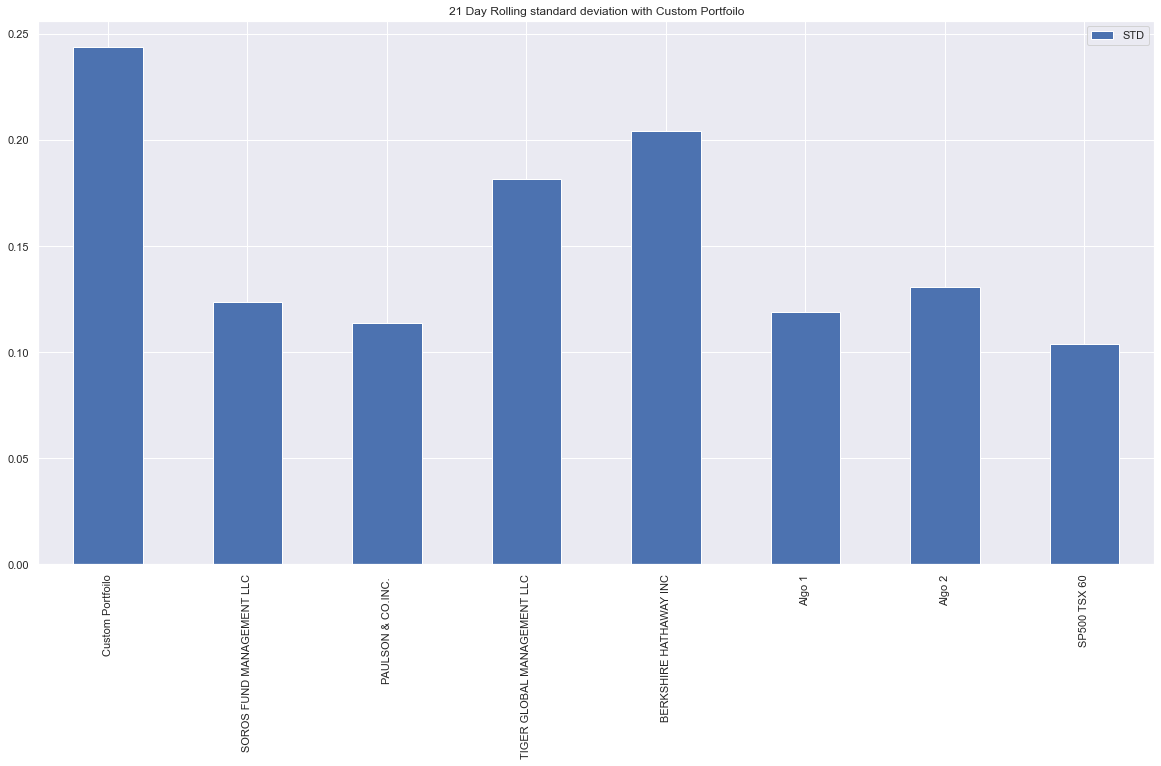

In [42]:
# Calculate rolling standard deviation
custom_daily_21d_std = custom_daily_annualized_std * np.sqrt(21)

# Plot rolling standard deviation

custom_daily_annualized_std.plot(kind ="bar", title="21 Day Rolling standard deviation with Custom Portfoilo", figsize = (20,10))

### Calculate and plot the correlation

Custom Portfoilo               1.000000
SOROS FUND MANAGEMENT LLC      0.592414
PAULSON & CO.INC.              0.444763
TIGER GLOBAL MANAGEMENT LLC    0.320125
BERKSHIRE HATHAWAY INC         0.627490
Algo 1                         0.147132
Algo 2                         0.587734
SP500 TSX 60                   0.423927
Name: Custom Portfoilo, dtype: float64


[Text(0.5, 1.0, 'Correlation matrix for Daily Returns Concat Dataframe Including the Custom Portfolio')]

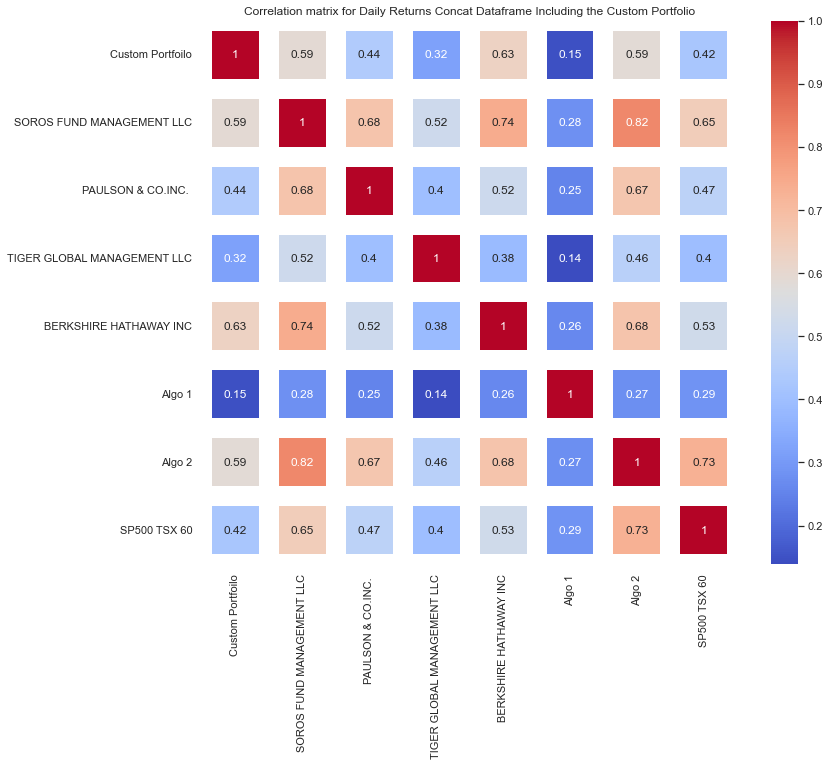

In [43]:
# Calculate and plot the correlation

# 1) calculate
custom_daily_correlation = pd.DataFrame(custom_daily_returns_concat.corr()).loc["Custom Portfoilo"]
custom_daily_correlation[custom_daily_correlation==custom_daily_correlation[custom_daily_correlation<1].max()]

print(custom_daily_correlation)

# 2) plot
custom_daily_correlation = custom_daily_returns_concat.corr()

sns.set(rc={"figure.figsize":(12, 10)})
sns.heatmap(custom_daily_correlation, cmap="coolwarm", linewidths=20, annot=True).set(title="Correlation matrix for Daily Returns Concat Dataframe Including the Custom Portfolio")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Beta Plot - Custom Portfolio : SP500 TSX 60'}>

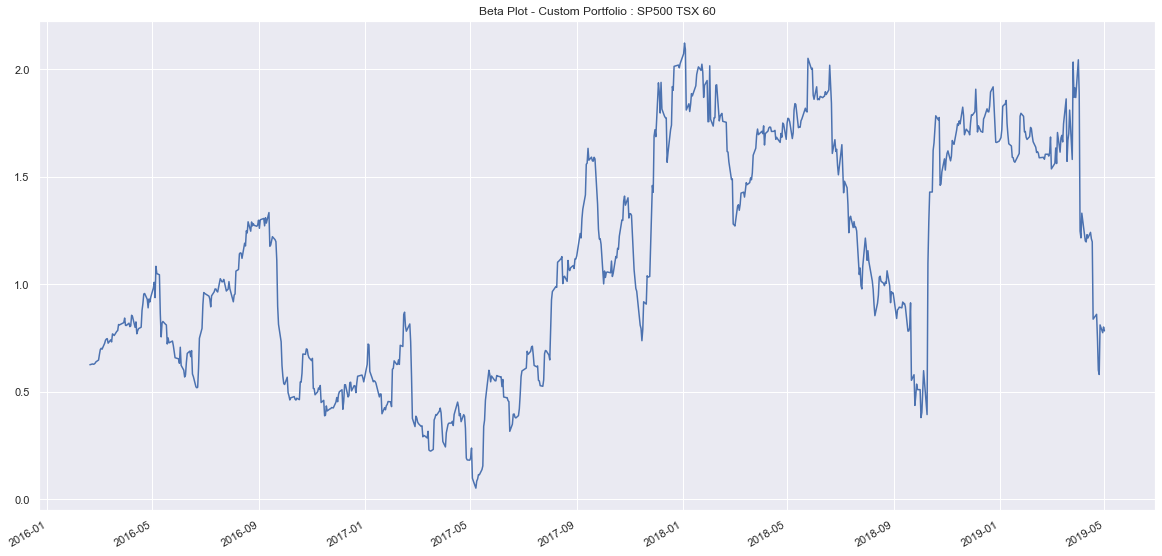

In [44]:
# Calculate and plot Beta

# 1) calculate 

# Calculate covariance of a single portfolio
custom_sptsx_cov = custom_daily_returns_concat["Custom Portfoilo"].rolling(window=60).cov(custom_daily_returns_concat["SP500 TSX 60"])

# Uses variance calculation of S&P TSX that occurs earlier in this .ipynb, refer to code below
# sptsx_var = daily_returns_concat["SP500 TSX 60"].rolling(window=60).var()

# Computing beta
custom_sptsx_beta = custom_sptsx_cov / sptsx_var

# print(custom_sptsx_beta)

# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_sptsx_beta.dropna(inplace=True)
custom_sptsx_beta.isnull().sum()

# compare .head() to verify .isnull()
# custom_sptsx_beta.head()

# 2) plot

custom_sptsx_beta.plot(kind="line", title="Beta Plot - Custom Portfolio : SP500 TSX 60", figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios

custom_daily_returns_sharpe = (custom_daily_returns_concat.mean() * 252) / (custom_daily_returns_concat.std() * np.sqrt(252))
custom_daily_returns_sharpe.sort_values()

PAULSON & CO.INC.             -0.573972
TIGER GLOBAL MANAGEMENT LLC   -0.220208
SOROS FUND MANAGEMENT LLC      0.287128
BERKSHIRE HATHAWAY INC         0.499017
Algo 2                         0.551057
SP500 TSX 60                   0.579992
Algo 1                         1.535205
Custom Portfoilo               1.704477
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios for the Custom Portfolio Daily Returns'}>

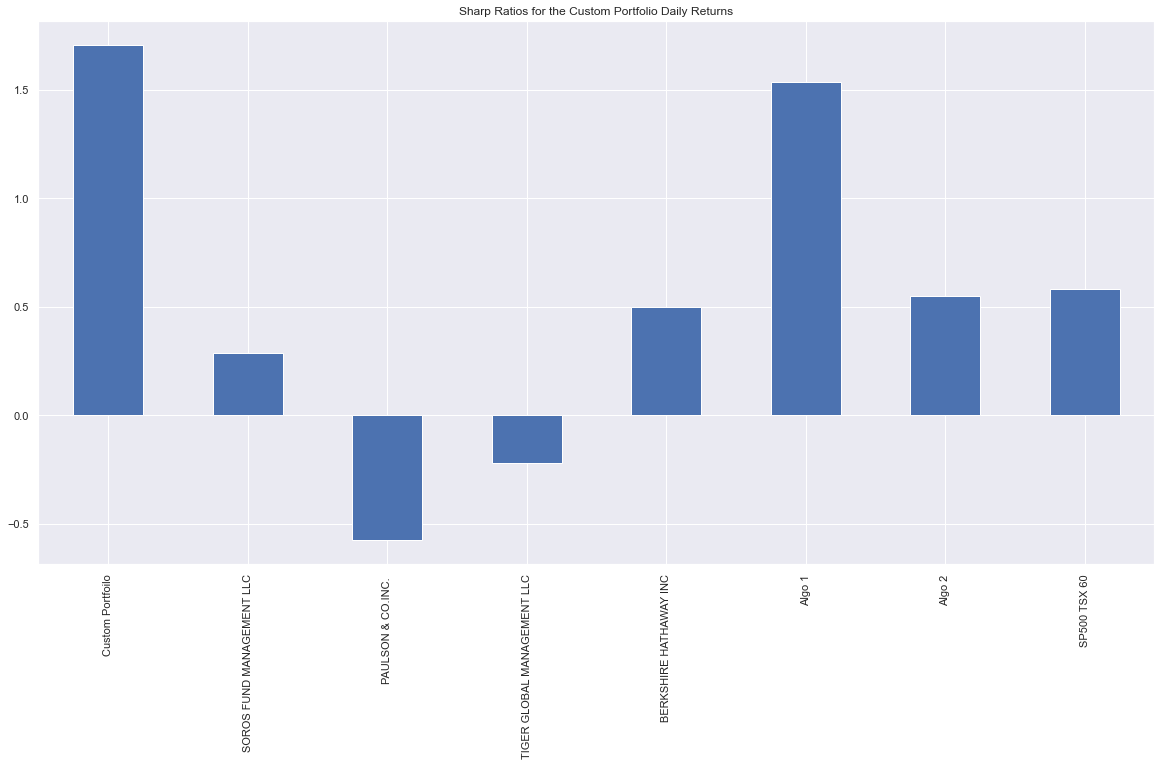

In [46]:
# Visualize the sharpe ratios as a bar plot

custom_daily_returns_sharpe.plot(kind ="bar", title="Sharp Ratios for the Custom Portfolio Daily Returns", figsize = (20,10))

### How does your portfolio do?

Based on the Sharp Ratio plot the Custom Portfolio outperforms the vehicles in this portfolio.